In [3]:
import pandas as pd

In [4]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis = 1)
ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


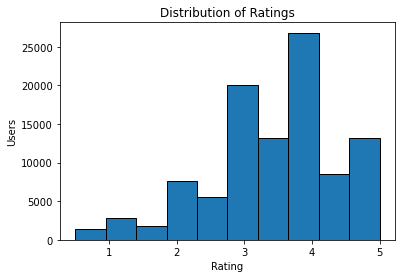

In [17]:
import matplotlib.pyplot as plt
ratings = pd.read_csv('ratings.csv')

plt.hist(ratings['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Users')
plt.title('Distribution of Ratings')
plt.show()


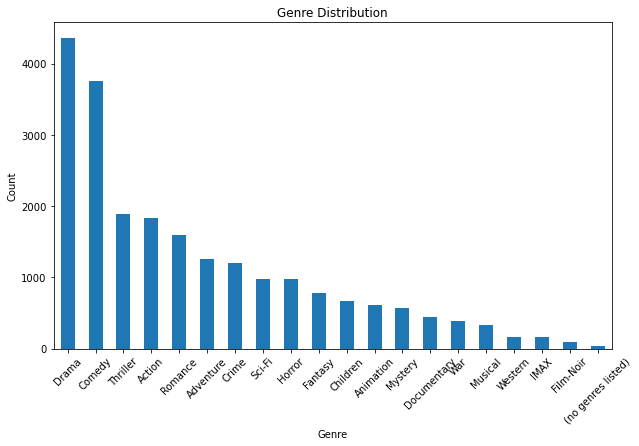

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('movies.csv')

# Split the genres and create a count plot
genres = movies['genres'].str.split('|', expand=True).stack()
plt.figure(figsize=(10, 6))
genres.value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.show()


In [6]:
#pearson is helping in linear correlation between two variables
item_similarity_df = user_ratings.corr(method='pearson')
item_similarity_df

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),0.049897,0.252226,0.195054,0.281934,0.240231,0.184324,0.274260,0.122107,0.017351,0.091416,...,0.304364,0.243820,-0.006269,0.242033,0.299522,1.000000,0.108147,0.097147,0.338034,0.109455
Zootopia (2016),0.003233,0.216007,0.319371,0.050031,0.094773,0.054024,0.077594,0.056742,0.063325,0.225747,...,0.286213,0.156603,0.011418,0.214385,0.298504,0.108147,1.000000,0.046885,0.200762,0.020595
eXistenZ (1999),0.187953,0.053614,0.177846,0.121029,0.088045,0.047804,0.085606,-0.001708,0.002528,0.128638,...,0.088202,0.028566,0.167541,0.145741,0.068763,0.097147,0.046885,1.000000,0.163022,0.138611


In [7]:
def get_similar_movies(movie_name, user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

In [8]:
movie_lover = [("Zoolander (2001)",5),("10 Things I Hate About You (1999)",1),("(500) Days of Summer (2009)",1)]

similar_movies = pd.DataFrame()

for movie, rating in movie_lover:
    similar_movies = similar_movies.append(get_similar_movies(movie, rating), ignore_index = True)
    
similar_movies.head()
similar_movies.sum().sort_values(ascending=False)

Zoolander (2001)                           1.698760
Cable Guy, The (1996)                      0.694717
Dodgeball: A True Underdog Story (2004)    0.674577
Scarface (1983)                            0.664581
Super Troopers (2001)                      0.650811
                                             ...   
Walk to Remember, A (2002)                -0.662689
50/50 (2011)                              -0.680021
Easy A (2010)                             -0.696066
10 Things I Hate About You (1999)         -1.206148
(500) Days of Summer (2009)               -1.280419
Length: 2269, dtype: float64